In [927]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy


In [449]:
##ran sequencing depth.py for all three species

In [941]:

species='human'
df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
d1 = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details/Sheet 3-Table 1.tsv', sep='\t')
           
d2 = df_seq_depth.groupby(['proj_id'])['counts_intra'].sum().reset_index().sort_values(by='counts_intra', ascending=False).merge(d1, left_on='proj_id', right_on='project')
df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
d3 = df_seq_depth.groupby(['proj_id'])['counts_inter'].sum().reset_index().sort_values(by='counts_inter', ascending=False).merge(d2, left_on='proj_id', right_on='project')
d3['total_ccontacts'] = d3['counts_inter'] + d3['counts_intra']


In [942]:
d3.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_total_counts.txt', index=False, sep='\t', header=None)



In [ ]:
df_intra.groupby('species')['proj_id'].nunique()

In [450]:
species_list = ['human','mouse','drosophila',]

In [783]:
df_list = []
for species in species_list: 
    df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
    df_seq_depth['species'] = species
    df_seq_depth.groupby(['proj_id'])['counts_intra'].sum().reset_index().sort_values(by='counts_intra', ascending=False).to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra_ordered.txt', index=False, sep='\t', header=None)

    df_list.append(df_seq_depth)
    
    

In [452]:

df_intra = pd.concat(df_list)
df_intra =df_intra.groupby(['species', 'proj_id', 'srx_id', 'run_id'])['counts_intra'].sum().reset_index()
df_intra['counts_intra_log'] = [np.log(x) for x in df_intra['counts_intra']]



In [921]:
df_intra

species    proj_id      srx_id       run_id  counts_intra  \
0      drosophila  ERP016479  ERX1973293   ERR1912865       5849651   
1      drosophila  ERP016479  ERX1973293   ERR1912866      56960473   
2      drosophila  ERP016479  ERX1973293   ERR1912867      51619773   
3      drosophila  ERP016479  ERX1973294   ERR1912868       2215043   
4      drosophila  ERP016479  ERX1973294   ERR1912869      36483414   
...           ...        ...         ...          ...           ...   
10833       mouse  SRP292639  SRX9533664  SRR13087451        474163   
10834       mouse  SRP292639  SRX9533665  SRR13087450        591452   
10835       mouse  SRP292639  SRX9533666  SRR13087449        603787   
10836       mouse  SRP292639  SRX9533667  SRR13087448        477567   
10837       mouse  SRP292639  SRX9533668  SRR13087447        252411   

       counts_intra_log    counts type  
0             15.581893   5849651  cis  
1             17.857868  56960473  cis  
2             17.759415  51619773  cis  
3             14.610782   2215043  cis  
4             17.412368  36483414  cis  
...                 ...       ...  ...  
10833         13.069306    474163  cis  
10834         13.290336    591452  cis  
10835         13.310977    603787  cis  
10836         13.076460    477567  cis  
10837         12.438814    252411  cis  

[10838 rows x 8 columns]

In [929]:
df_intra.groupby('species')['proj_id'].nunique()

species
drosophila     29
human         119
mouse          33
Name: proj_id, dtype: int64

In [782]:
df_list = []
for species in species_list: 
    df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
    df_seq_depth['species'] = species
    df_seq_depth.groupby(['proj_id'])['counts_inter'].sum().reset_index().sort_values(by='counts_inter', ascending=False).to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter_ordered.txt', index=False, sep='\t', header=None)

    df_list.append(df_seq_depth)
    
    

In [454]:
df_inter = pd.concat(df_list)

In [455]:
df_intra['counts'] = df_intra['counts_intra']
df_intra['type'] = 'cis'
df_inter['counts'] = df_inter['counts_inter']
df_inter['type'] = 'trans'

In [829]:
df_all_counts_cis_vs_trans = df_intra.merge(df_inter, on=['proj_id', 'species'])

In [456]:
df_all_counts = pd.concat([df_intra, df_inter])

In [457]:
df_all_counts['counts_log'] = [np.log10(x) for x in df_all_counts['counts'] ]

In [458]:
df_all_counts_projects = df_all_counts.groupby(['species', 'proj_id', 'type'])['counts'].sum().reset_index()


In [919]:
df_all_counts_projects

species    proj_id   type      counts  counts_log  \
0    drosophila  ERP016479    cis  1095110139    9.039458   
1    drosophila  ERP112723    cis    52975100    7.724072   
2    drosophila  ERP112882    cis   325091050    8.512005   
3    drosophila  ERP122732    cis  3648193480    9.562078   
4    drosophila  SRP050096    cis  1002845398    9.001234   
..          ...        ...    ...         ...         ...   
357       mouse  SRP255620  trans   532658360    8.726449   
358       mouse  SRP261290  trans  1827183488    9.261782   
359       mouse  SRP268173  trans   581117420    8.764264   
360       mouse  SRP270993  trans   561311230    8.749204   
361       mouse  SRP292639  trans    75510394    7.878007   

           genome_volume  genome_density  genome_density_log  
0       3013409580879291    3.634123e-07           -6.439600  
1       3013409580879291    1.757979e-08           -7.754986  
2       3013409580879291    1.078815e-07           -6.967053  
3       3013409580879291    1.210653e-06           -5.916980  
4       3013409580879291    3.327943e-07           -6.477824  
..                   ...             ...                 ...  
357  5726724633169315728    9.301274e-11          -10.031458  
358  5726724633169315728    3.190626e-10           -9.496124  
359  5726724633169315728    1.014747e-10           -9.993642  
360  5726724633169315728    9.801610e-11          -10.008703  
361  5726724633169315728    1.318562e-11          -10.879900  

[362 rows x 8 columns]

In [459]:
df_all_counts_projects['counts_log'] = [np.log10(x) for x in df_all_counts_projects['counts'] ]


In [460]:
df_all_counts_projects_meta = df_all_counts_projects.groupby(['species', 'type'])['counts'].sum().reset_index()
df_all_counts_projects_meta['counts_log'] = [np.log10(x) for x in df_all_counts_projects_meta['counts'] ]

df_all_counts_projects_meta['species_dig'] = [0 if x=='human' else 1 if x=='mouse' else 2 for x in df_all_counts_projects_meta['species']]



df_all_counts_projects_meta.sort_values(['species_dig'], inplace=True)



In [658]:
df_all_counts_projects

species    proj_id   type      counts  counts_log  \
0    drosophila  ERP016479    cis  1095110139    9.039458   
1    drosophila  ERP112723    cis    52975100    7.724072   
2    drosophila  ERP112882    cis   325091050    8.512005   
3    drosophila  ERP122732    cis  3648193480    9.562078   
4    drosophila  SRP050096    cis  1002845398    9.001234   
..          ...        ...    ...         ...         ...   
357       mouse  SRP255620  trans   532658360    8.726449   
358       mouse  SRP261290  trans  1827183488    9.261782   
359       mouse  SRP268173  trans   581117420    8.764264   
360       mouse  SRP270993  trans   561311230    8.749204   
361       mouse  SRP292639  trans    75510394    7.878007   

           genome_volume  genome_density  genome_density_log  
0       3013409580879291    3.634123e-07           -6.439600  
1       3013409580879291    1.757979e-08           -7.754986  
2       3013409580879291    1.078815e-07           -6.967053  
3       3013409580879291    1.210653e-06           -5.916980  
4       3013409580879291    3.327943e-07           -6.477824  
..                   ...             ...                 ...  
357  5726724633169315728    9.301274e-11          -10.031458  
358  5726724633169315728    3.190626e-10           -9.496124  
359  5726724633169315728    1.014747e-10           -9.993642  
360  5726724633169315728    9.801610e-11          -10.008703  
361  5726724633169315728    1.318562e-11          -10.879900  

[362 rows x 8 columns]

In [694]:
df_all_counts_projects[df_all_counts_projects['proj_id'] == 'SRP120957']

species    proj_id   type      counts  counts_log        genome_volume  \
97    human  SRP120957    cis  1089703229    9.037308   446638304655677934   
216   human  SRP120957  trans   790857054    8.898098  7818995446846638550   

     genome_density  genome_density_log  
97     2.439789e-09           -8.612648  
216    1.011456e-10           -9.995053

In [697]:
df_all_counts_projects.sort_values(['counts'], ascending=False)

species    proj_id   type       counts  counts_log        genome_volume  \
347   mouse  SRP217487  trans  51833900034   10.714614  5726724633169315728   
314   mouse  SRP217487    cis  20638372911   10.314675   338390139063593401   
117   human  SRP152979    cis  16067513772   10.205949   446638304655677934   
64    human  SRP050102    cis  13600988201   10.133570   446638304655677934   
63    human  SRP012412    cis  13329635454   10.124818   446638304655677934   
..      ...        ...    ...          ...         ...                  ...   
139   human  SRP182670    cis       266165    5.425151   446638304655677934   
187   human  SRP076397  trans       152670    5.183754  7818995446846638550   
258   human  SRP182670  trans        86434    4.936685  7818995446846638550   
206   human  SRP109036  trans         7568    3.878981  7818995446846638550   
87    human  SRP109036    cis         2400    3.380211   446638304655677934   

     genome_density  genome_density_log  
347    9.051230e-09           -8.043292  
314    6.098988e-08           -7.214742  
117    3.597433e-08           -7.444007  
64     3.045191e-08           -7.516386  
63     2.984436e-08           -7.525138  
..              ...                 ...  
139    5.959296e-13          -12.224805  
187    1.952553e-14          -13.709397  
258    1.105436e-14          -13.956466  
206    9.678993e-16          -15.014170  
87     5.373476e-15          -14.269745  

[362 rows x 8 columns]

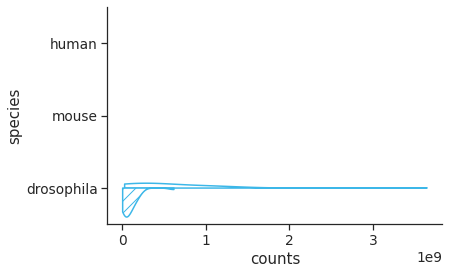

In [842]:
import matplotlib as mpl
markers = {"cis": "o", "trans": "X"}
#sns.scatterplot(data=df_all_counts_projects_meta, y='species', x='counts_log', style='type',s=60, legend=False, color='w', markers=markers, edgecolor='black', linewidth=2)
sc_bar = sns.violinplot(data=df_all_counts_projects[df_all_counts_projects['species']=='drosophila'],  x='counts',y='species', order=['human', 'mouse', 'drosophila'], hue='type',split=True,  height=6, aspect=9/9.5, cut=0, palette=['white', 'white'], legend=False,dodge=True, inner=None)
#sc3 = sns.scatterplot(data=df_all_counts_projects_meta, y='species', x='counts', style='type',s=60, legend=False, color=['w'], markers=markers, edgecolor='black')
pattern=['','//', '','//', '','//']
violin_color = ['#3CB7E8', '#3CB7E8', '#E83B43', '#E83B43', '#E8A63B','#E8A63B']
violin_colors=iter(violin_color)
# replace 2 with 7 in your code
hatches=iter(pattern)
_ = [i.set_edgecolor(next(violin_colors)) for i in sc3.get_children() if isinstance(i, mpl.collections.PolyCollection)]
violin_colors=iter(violin_color)
_ = [i.set_edgecolor(next(violin_colors)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]

_ = [i.set_hatch(next(hatches)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]
sc_bar.legend().remove()

#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/per_proj_seq_depth.pdf', transparent=True)

No handles with labels found to put in legend.


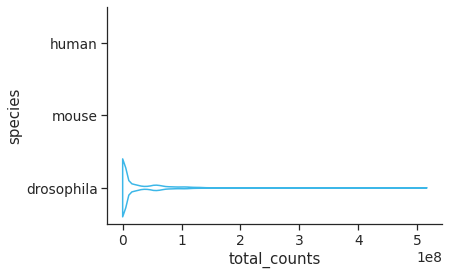

In [841]:
import matplotlib as mpl
markers = {"cis": "o", "trans": "X"}
#sns.scatterplot(data=df_all_counts_projects_meta, y='species', x='counts_log', style='type',s=60, legend=False, color='w', markers=markers, edgecolor='black', linewidth=2)
sc_bar = sns.violinplot(data=df_all_counts_cis_vs_trans[df_all_counts_cis_vs_trans['species']=='drosophila'],  x='total_counts',y='species', order=['human', 'mouse', 'drosophila'],  height=6, aspect=9/9.5, cut=0, palette=['white', 'white'], legend=False,dodge=True, inner=None)
#sc3 = sns.scatterplot(data=df_all_counts_projects_meta, y='species', x='counts_log', style='type',s=60, legend=False, color=['w'], markers=markers, edgecolor='black')
pattern=['','//', '','//', '','//']
violin_color = ['#3CB7E8', '#3CB7E8', '#E83B43', '#E83B43', '#E8A63B','#E8A63B']
violin_colors=iter(violin_color)
# replace 2 with 7 in your code
hatches=iter(pattern)
_ = [i.set_edgecolor(next(violin_colors)) for i in sc3.get_children() if isinstance(i, mpl.collections.PolyCollection)]
violin_colors=iter(violin_color)
_ = [i.set_edgecolor(next(violin_colors)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]

_ = [i.set_hatch(next(hatches)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]
sc_bar.legend().remove()

#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/per_proj_seq_depth.pdf', transparent=True)

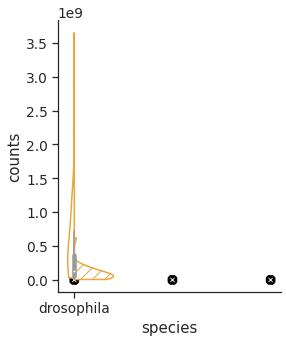

In [900]:
import matplotlib as mpl
from matplotlib import rcParams
fig, ax = plt.subplots()
rcParams['figure.figsize'] = 4,5
markers = {"cis": "o", "trans": "X"}
for species in ['drosophila']:
    #sns.scatterplot(data=df_all_counts_projects_meta, x='species', y='counts_log', style='type',s=60, legend=False, color='w', markers=markers, edgecolor='black', linewidth=2)
    sc_bar = sns.violinplot(data=df_all_counts_projects[df_all_counts_projects['species']==species],  y='counts',x='species',  hue='type',split=True, aspect=1, cut=0, palette=['white', 'white'], legend=False,dodge=True)
    #sc3 = sns.scatterplot(data=df_all_counts_projects_meta, y='species', x='counts_log', style='type',s=60, legend=False, color=['w'], markers=markers, edgecolor='black')
    pattern=['','//', '','//', '','//']
    if species == 'human':
        violin_color = ['#3CB7E8', '#3CB7E8']
    elif species == 'mouse':
        violin_color = ['#E83B43', '#E83B43']
    else:
        violin_color = ['#E8A63B','#E8A63B']
    violin_colors=iter(violin_color)
    # replace 2 with 7 in your code
    hatches=iter(pattern)
    #_ = [i.set_edgecolor(next(violin_colors)) for i in sc3.get_children() if isinstance(i, mpl.collections.PolyCollection)]
    violin_colors=iter(violin_color)
    _ = [i.set_edgecolor(next(violin_colors)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]

    _ = [i.set_hatch(next(hatches)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]
    sc_bar.legend().remove()
    plt.plot()

#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/per_proj_seq_depth.pdf', transparent=True)



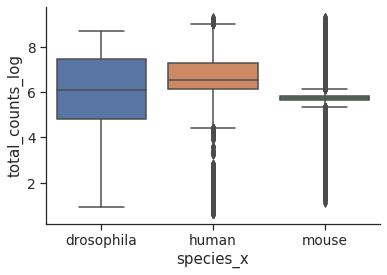

In [820]:
import matplotlib as mpl
markers = {"cis": "o", "trans": "X"}
#sns.scatterplot(data=df_all_counts_cis_vs_trans, x='counts_inter', y='counts_intra')
sc_bar = sns.boxplot(data=df_all_counts_cis_vs_trans,  y='total_counts_log',x='species_x')
#sc3 = sns.scatterplot(data=df_all_counts_projects_meta, y='species', x='counts', style='type',s=60, legend=False, color=['w'], markers=markers, edgecolor='black')

#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/per_proj_seq_depth.pdf', transparent=True)

In [830]:
df_all_counts_cis_vs_trans['total_counts'] = df_all_counts_cis_vs_trans['counts_intra'] + df_all_counts_cis_vs_trans['counts_inter']



In [831]:
df_all_counts_cis_vs_trans['total_counts_log'] = [np.log10(x) for x in df_all_counts_cis_vs_trans['total_counts'] ]


In [804]:
df_all_counts_projects.groupby('proj_id')

species    proj_id   type      counts  counts_log        genome_volume  \
58    human  DRP005173    cis   189959809    8.278662   446638304655677934   
59    human  DRP005280    cis   361836452    8.558512   446638304655677934   
60    human  ERP104251    cis   469216847    8.671374   446638304655677934   
61    human  ERP107279    cis  2792708016    9.446026   446638304655677934   
62    human  ERP118600    cis   669098393    8.825490   446638304655677934   
..      ...        ...    ...         ...         ...                  ...   
291   human  SRP264796  trans   106142904    8.025891  7818995446846638550   
292   human  SRP267107  trans   502487970    8.701126  7818995446846638550   
293   human  SRP271101  trans   462355800    8.664976  7818995446846638550   
294   human  SRP272124  trans    24488520    7.388963  7818995446846638550   
295   human  SRP274139  trans   134998720    8.130330  7818995446846638550   

     genome_density  genome_density_log  
58     4.253102e-10           -9.371294  
59     8.101331e-10           -9.091444  
60     1.050552e-09           -8.978582  
61     6.252728e-09           -8.203930  
62     1.498077e-09           -8.824466  
..              ...                 ...  
291    1.357501e-11          -10.867260  
292    6.426503e-11          -10.192025  
293    5.913238e-11          -10.228175  
294    3.131927e-12          -11.504188  
295    1.726548e-11          -10.762821  

[238 rows x 8 columns]

In [761]:

def get_chrom_sizes(chroms, chrom_list):
    chrom_sizes = []
    chrom_sizes = {}
    total_genome_length = []
    with open(chroms, 'r') as f:
        for line in f:
            values = line.split('\t')
            if values[0] in chrom_list:
                #chrom_sizes.append(int(values[1]) * int(values[1])) 
                #total_genome_length.append(int(values[1]))
                chrom_sizes[values[0]] = int(values[1])
    #return(sum(chrom_sizes), (sum(total_genome_length) * sum(total_genome_length)) - sum(chrom_sizes))
    return chrom_sizes

species_total_contacts = {}
for species,  chrom_sizes, chrom_list in zip(['human', 'mouse', 'drosophila'], ['homo_sapiens_38/hg38.chrom.sizes', 'mus_musculus_10/mm10.chrom.sizes', 'drosophila_melanogaster_6/dm6.chrom.sizes'], [['chr' + str(x) for x in range(1,23)], ['chr' + str(x) for x in range(1,20)], ['chr3R','chr3L','chr2R','chr2L','chr4']]):
        #cis_contacts_genome, trans_contacts_genome = get_chrom_sizes(f'/grid/gillis/data/nfox/genomes/{chrom_sizes}', chrom_list)
        cis_contacts_genome = get_chrom_sizes(f'/grid/gillis/data/nfox/genomes/{chrom_sizes}', chrom_list)
        print (dict(sorted(cis_contacts_genome.items(), key=lambda item: item[1])))
        #species_total_contacts[species] =  cis_contacts_genome, trans_contacts_genome





{'chr21': 46709983, 'chr22': 50818468, 'chr19': 58617616, 'chr20': 64444167, 'chr18': 80373285, 'chr17': 83257441, 'chr16': 90338345, 'chr15': 101991189, 'chr14': 107043718, 'chr13': 114364328, 'chr12': 133275309, 'chr10': 133797422, 'chr11': 135086622, 'chr9': 138394717, 'chr8': 145138636, 'chr7': 159345973, 'chr6': 170805979, 'chr5': 181538259, 'chr4': 190214555, 'chr3': 198295559, 'chr2': 242193529, 'chr1': 248956422}
{'chr19': 61431566, 'chr18': 90702639, 'chr17': 94987271, 'chr16': 98207768, 'chr15': 104043685, 'chr12': 120129022, 'chr13': 120421639, 'chr11': 122082543, 'chr9': 124595110, 'chr14': 124902244, 'chr8': 129401213, 'chr10': 130694993, 'chr7': 145441459, 'chr6': 149736546, 'chr5': 151834684, 'chr4': 156508116, 'chr3': 160039680, 'chr2': 182113224, 'chr1': 195471971}
{'chr4': 1348131, 'chr2L': 23513712, 'chr2R': 25286936, 'chr3L': 28110227, 'chr3R': 32079331}


In [760]:
dict(sorted(cis_contacts_genome.items(), key=lambda item: item[1]))

{'chr4': 1348131,
 'chr2L': 23513712,
 'chr2R': 25286936,
 'chr3L': 28110227,
 'chr3R': 32079331}

In [685]:
cis_trans_ratio_list = {}
cis_trans_ratio_list["0"] = [species_total_contacts['human'][1]/species_total_contacts['human'][0]]
cis_trans_ratio_list["1"] = [species_total_contacts['mouse'][1]/species_total_contacts['mouse'][0]]
cis_trans_ratio_list["2"] = [species_total_contacts['drosophila'][1]/species_total_contacts['drosophila'][0]]


In [686]:
cis_trans_ratio_list

{'0': [17.506325286798795],
 '1': [16.923438280490487],
 '2': [3.0401240804355325]}

In [687]:
pd.DataFrame.from_dict(cis_trans_ratio_list)

0          1         2
0  17.506325  16.923438  3.040124

<AxesSubplot:>

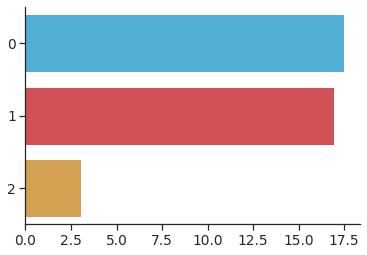

In [691]:
sns.barplot(data=pd.DataFrame.from_dict(cis_trans_ratio_list), orient='h', palette=['#3CB7E8', '#E83B43', '#E8A63B'])


In [518]:
df1 = pd.DataFrame(species_total_contacts, index=['cis', 'trans'])

In [519]:
df1.reset_index(inplace=True)

In [520]:
df1['species'] = 0

In [522]:
df1 = pd.melt(df1, id_vars=['species', 'index'])

In [527]:
df1 = df1.drop(['species'], axis=1)

In [530]:
df1 = df1.rename(columns={"index": "type", "variable": "species", "value":"genome_volume"})

In [532]:
df_all_counts_projects = df_all_counts_projects.merge(df1)

In [534]:
df_all_counts_projects['genome_density'] = df_all_counts_projects['counts'] / df_all_counts_projects['genome_volume']

df_all_counts_projects['genome_density_log'] = [np.log10(x) for x in df_all_counts_projects['genome_density'] ]

In [543]:
df_all_counts_projects_meta = df_all_counts_projects_meta.merge(df1)

In [544]:
df_all_counts_projects_meta['genome_density'] = df_all_counts_projects_meta['counts'] / df_all_counts_projects_meta['genome_volume']

df_all_counts_projects_meta['genome_density_log'] = [np.log10(x) for x in df_all_counts_projects_meta['genome_density'] ]


In [548]:
df_all_counts_projects_meta

species   type        counts  counts_log  species_dig  \
0       human    cis  208492043801   11.319089            0   
1       human  trans   96455324722   10.984326            0   
2       mouse    cis  108163074666   11.034079            1   
3       mouse  trans   85411419194   10.931516            1   
4  drosophila    cis   16618040587   10.220580            2   
5  drosophila  trans    2739466826    9.437666            2   

         genome_volume  genome_density  genome_density_log  
0   446638304655677934    4.668029e-07           -6.330866  
1  7818995446846638550    1.233603e-08           -7.908825  
2   338390139063593401    3.196401e-07           -6.495339  
3  5726724633169315728    1.491453e-08           -7.826390  
4     3013409580879291    5.514697e-06           -5.258478  
5     9161139031046278    2.990312e-07           -6.524283

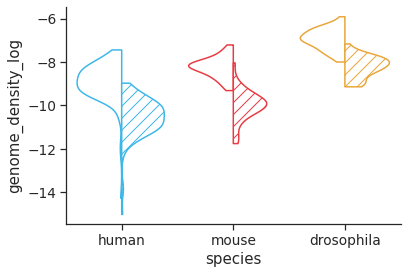

In [646]:
import matplotlib as mpl
markers = {"cis": "o", "trans": "X"}
#sns.scatterplot(data=df_all_counts_projects_meta, x='species', y='genome_density_log', style='type',s=60, legend=False, color='w', markers=markers, edgecolor='black', linewidth=2, hue='type')
sc_bar = sns.violinplot(data=df_all_counts_projects,  y='genome_density_log',x='species', order=['human', 'mouse', 'drosophila'], hue='type',split=True,  height=6, aspect=9/9.5, cut=0, palette=['white', 'white'], legend=False,dodge=True, inner=None)
#sc3 = sns.scatterplot(data=df_all_counts_projects_meta, x='species', y='genome_density_log', style='type',s=60, legend=False, color=['w'], markers=markers, edgecolor='black', hue='type')
#sc_swarm = sns.swarmplot(data=df_all_counts_projects_meta, x='species', y='genome_density_log', order=['human', 'mouse', 'drosophila'], hue='type',  palette=['white', 'black', 'red', 'green'],dodge=True, size=8, edgecolor='black', linewidth=1)
pattern=['','//', '','//', '','//']
violin_color = ['#3CB7E8', '#3CB7E8', '#E83B43', '#E83B43', '#E8A63B','#E8A63B']
violin_colors=iter(violin_color)
# replace 2 with 7 in your code
hatches=iter(pattern)
_ = [i.set_edgecolor(next(violin_colors)) for i in sc_swarm.get_children() if isinstance(i, mpl.collections.PolyCollection)]


violin_colors=iter(violin_color)
_ = [i.set_edgecolor(next(violin_colors)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]

_ = [i.set_hatch(next(hatches)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]
sc_bar.legend().remove()

plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/per_proj_seq_depth_density.pdf',
            transparent=True)


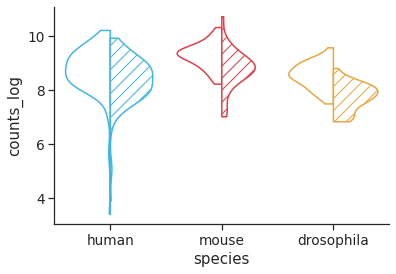

In [644]:
import matplotlib as mpl
markers = {"cis": "o", "trans": "X"}
#sns.scatterplot(data=df_all_counts_projects_meta, x='species', y='genome_density_log', style='type',s=60, legend=False, color='w', markers=markers, edgecolor='black', linewidth=2, hue='type')
sc_bar = sns.violinplot(data=df_all_counts_projects,  y='counts_log',x='species', order=['human', 'mouse', 'drosophila'], hue='type',split=True,  height=6, aspect=9/9.5, cut=0, palette=['white', 'white'], legend=False,dodge=True, inner=None)
#sc3 = sns.scatterplot(data=df_all_counts_projects_meta, x='species', y='counts_log', style='type',s=60, legend=False, color=['w'], markers=markers, edgecolor='black', hue='type')
#sc_swarm = sns.swarmplot(data=df_all_counts_projects_meta, x='species', y='counts_log', order=['human'], hue='type',  palette=['white', 'black', 'red', 'green'],dodge=True, size=8, edgecolor='black', linewidth=1)
pattern=['','//', '','//', '','//']
violin_color = ['#3CB7E8', '#3CB7E8', '#E83B43', '#E83B43', '#E8A63B','#E8A63B']
violin_colors=iter(violin_color)
# replace 2 with 7 in your code
hatches=iter(pattern)
_ = [i.set_edgecolor(next(violin_colors)) for i in sc_swarm.get_children() if isinstance(i, mpl.collections.PolyCollection)]


violin_colors=iter(violin_color)
_ = [i.set_edgecolor(next(violin_colors)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]

_ = [i.set_hatch(next(hatches)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]
sc_bar.legend().remove()

plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/per_proj_seq_depth.pdf',
            transparent=True)


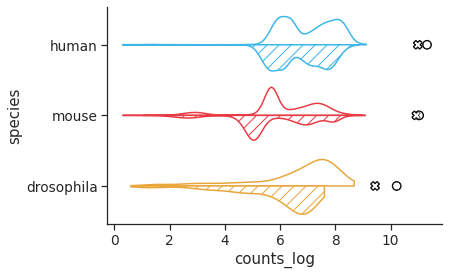

In [415]:
import matplotlib as mpl
sns.scatterplot(data=df_all_counts_projects_meta, y='species', x='counts_log', style='type',s=60, legend=False, color='w', markers=markers, edgecolor='black', linewidth=2)
sc_bar = sns.violinplot(data=df_all_counts,  x='counts_log',y='species', order=['human', 'mouse', 'drosophila'], hue='type',split=True,  height=6, aspect=9/9.5, cut=0, palette=['white', 'white'], legend=False,dodge=True, inner=None)

sc3 = sns.scatterplot(data=df_all_counts_projects_meta, y='species', x='counts_log', style='type',s=60, legend=False, color=['w'], markers=markers, edgecolor='black')
pattern=['','//', '','//', '','//']
violin_color = ['#3CB7E8', '#3CB7E8', '#E83B43', '#E83B43', '#E8A63B','#E8A63B']
violin_colors=iter(violin_color)
# replace 2 with 7 in your code
hatches=iter(pattern)
_ = [i.set_edgecolor(next(violin_colors)) for i in sc3.get_children() if isinstance(i, mpl.collections.PolyCollection)]
violin_colors=iter(violin_color)
_ = [i.set_edgecolor(next(violin_colors)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]

_ = [i.set_hatch(next(hatches)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]
sc_bar.legend().remove()
plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/per_run_seq_depth.pdf',
            transparent=True)



In [611]:
df_total_runs_intra = df_intra.groupby(['species'])['run_id'].count().reset_index()
df_total_runs_intra['type'] = 'cis'

df_total_runs_inter = df_inter.groupby(['species'])['run_id'].count().reset_index()
df_total_runs_inter['type'] = 'trans'

df_total_runs = pd.concat([df_total_runs_intra, df_total_runs_inter])

#df_total_runs['run_id'] = [np.log10(x) for x in df_total_runs['run_id'] ]

In [612]:
df_total_runs_intra = df_intra.groupby(['species'])['proj_id'].nunique().reset_index()
df_total_runs_intra['type'] = 'cis'

df_total_runs_inter = df_inter.groupby(['species'])['proj_id'].nunique().reset_index()
df_total_runs_inter['type'] = 'trans'

df_total_projects = pd.concat([df_total_runs_intra, df_total_runs_inter])

#df_total_projects['proj_id'] = [np.log10(x) for x in df_total_projects['proj_id'] ]

In [613]:
df_total_runs_intra = df_intra.groupby(['species', 'proj_id'])['run_id'].count().reset_index()
df_total_runs_intra['type'] = 'cis'

df_total_runs_inter = df_inter.groupby(['species', 'proj_id'])['run_id'].count().reset_index()
df_total_runs_inter['type'] = 'trans'

df_total_runs_per_proj = pd.concat([df_total_runs_intra, df_total_runs_inter])

df_total_runs_per_proj['run_id_log'] = [np.log10(x) for x in df_total_runs_per_proj['run_id']]

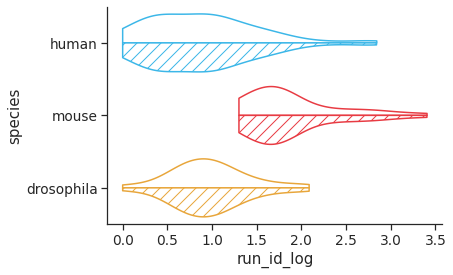

In [614]:
import matplotlib as mpl
sc_bar = sns.violinplot(data=df_total_runs_per_proj,  x='run_id_log',y='species', order=['human', 'mouse', 'drosophila'], hue='type',split=True,  height=6, aspect=9/9.5, cut=0, palette=['white', 'white'], legend=False,dodge=True,inner=None)


pattern=['','//', '','//', '','//']
violin_color = ['#3CB7E8', '#3CB7E8', '#E83B43', '#E83B43', '#E8A63B','#E8A63B']
violin_colors=iter(violin_color)
# replace 2 with 7 in your code
hatches=iter(pattern)
_ = [i.set_edgecolor(next(violin_colors)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]

_ = [i.set_hatch(next(hatches)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]
sc_bar.legend().remove()
plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/runs_per_proj.pdf',
            transparent=True)

No handles with labels found to put in legend.


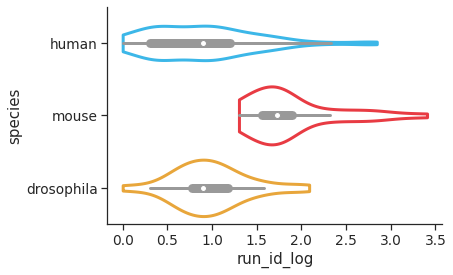

In [654]:
import matplotlib as mpl
sc_bar = sns.violinplot(data=df_total_runs_per_proj,  x='run_id_log',y='species', order=['human', 'mouse', 'drosophila'] , height=6, aspect=9/9.5, cut=0, palette=['white', 'white'], legend=False,dodge=True, edgecolor='black', linewidth=3)


pattern=['','//', '','//', '','//']
violin_color = ['#3CB7E8', '#E83B43', '#E8A63B']
violin_colors=iter(violin_color)
# replace 2 with 7 in your code
hatches=iter(pattern)
_ = [i.set_edgecolor(next(violin_colors)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]

#_ = [i.set_hatch(next(hatches)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]
sc_bar.legend().remove()
plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/runs_per_proj.pdf',
            transparent=True)

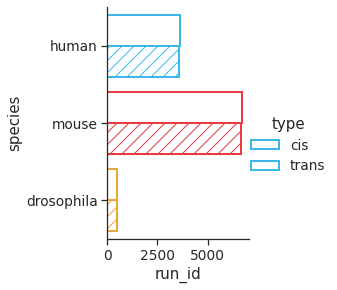

In [417]:
sc_bar = sns.catplot(data=df_total_runs, y='species', x='run_id', height=4, aspect=9/9.5, kind="bar", hue='type', order=['human', 'mouse', 'drosophila'], fill=False, edgecolor=['#3CB7E8', '#E83B43', '#E8A63B'], linewidth=2)
bars = sc_bar.axes.ravel()[0].patches

pattern=[' ','//']

# replace 2 with 7 in your code
hatches=np.repeat(pattern,3)

for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)
    
plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/runs_per_species.pdf',
            transparent=True)

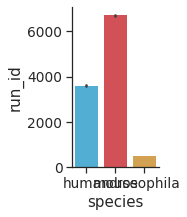

In [912]:
sc_bar = sns.catplot(data=df_total_runs, x='species', y='run_id', height=3, aspect=8/9.5, kind="bar", order=['human', 'mouse', 'drosophila'], fill=True, edgecolor=['black', 'black', 'black'], linewidth=0, palette=['#3CB7E8', '#E83B43', '#E8A63B'])
bars = sc_bar.axes.ravel()[0].patches

pattern=[' ','//']

# replace 2 with 7 in your code
hatches=np.repeat(pattern,3)

#for pat,bar in zip(hatches,bars):
#    bar.set_hatch(pat)
    
plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/runs_per_species.pdf',
            transparent=True)

In [926]:
df_total_runs

species  run_id   type
0  drosophila     487    cis
1       human    3619    cis
2       mouse    6732    cis
0  drosophila     487  trans
1       human    3579  trans
2       mouse    6679  trans

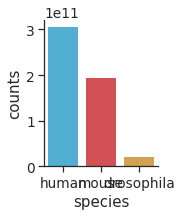

In [925]:
sc_bar = sns.catplot(data=df_all_counts_projects_meta.groupby('species')['counts'].sum().reset_index(), x='species', y='counts', height=3, aspect=8/9.5, kind="bar", order=['human', 'mouse', 'drosophila'], fill=True, edgecolor=['black', 'black', 'black'], linewidth=0, palette=['#3CB7E8', '#E83B43', '#E8A63B'])
bars = sc_bar.axes.ravel()[0].patches

pattern=[' ','//']

# replace 2 with 7 in your code
hatches=np.repeat(pattern,3)

#for pat,bar in zip(hatches,bars):
#    bar.set_hatch(pat)

In [924]:
df_all_counts_projects_meta.groupby('species')['counts'].sum().reset_index()

species        counts
0  drosophila   19357507413
1       human  304947368523
2       mouse  193574493860

In [917]:
df_all_counts_projects[df_all_counts_projects['species'] == 'human']

species    proj_id   type      counts  counts_log        genome_volume  \
58    human  DRP005173    cis   189959809    8.278662   446638304655677934   
59    human  DRP005280    cis   361836452    8.558512   446638304655677934   
60    human  ERP104251    cis   469216847    8.671374   446638304655677934   
61    human  ERP107279    cis  2792708016    9.446026   446638304655677934   
62    human  ERP118600    cis   669098393    8.825490   446638304655677934   
..      ...        ...    ...         ...         ...                  ...   
291   human  SRP264796  trans   106142904    8.025891  7818995446846638550   
292   human  SRP267107  trans   502487970    8.701126  7818995446846638550   
293   human  SRP271101  trans   462355800    8.664976  7818995446846638550   
294   human  SRP272124  trans    24488520    7.388963  7818995446846638550   
295   human  SRP274139  trans   134998720    8.130330  7818995446846638550   

     genome_density  genome_density_log  
58     4.253102e-10           -9.371294  
59     8.101331e-10           -9.091444  
60     1.050552e-09           -8.978582  
61     6.252728e-09           -8.203930  
62     1.498077e-09           -8.824466  
..              ...                 ...  
291    1.357501e-11          -10.867260  
292    6.426503e-11          -10.192025  
293    5.913238e-11          -10.228175  
294    3.131927e-12          -11.504188  
295    1.726548e-11          -10.762821  

[238 rows x 8 columns]

In [915]:
df_all_counts_projects_meta

species   type        counts  counts_log  species_dig  \
0       human    cis  208492043801   11.319089            0   
1       human  trans   96455324722   10.984326            0   
2       mouse    cis  108163074666   11.034079            1   
3       mouse  trans   85411419194   10.931516            1   
4  drosophila    cis   16618040587   10.220580            2   
5  drosophila  trans    2739466826    9.437666            2   

         genome_volume  genome_density  genome_density_log  
0   446638304655677934    4.668029e-07           -6.330866  
1  7818995446846638550    1.233603e-08           -7.908825  
2   338390139063593401    3.196401e-07           -6.495339  
3  5726724633169315728    1.491453e-08           -7.826390  
4     3013409580879291    5.514697e-06           -5.258478  
5     9161139031046278    2.990312e-07           -6.524283

In [784]:
df_total_runs

species  run_id   type
0  drosophila     487    cis
1       human    3619    cis
2       mouse    6732    cis
0  drosophila     487  trans
1       human    3579  trans
2       mouse    6679  trans

In [785]:
df_total_projects

species  proj_id   type
0  drosophila       29    cis
1       human      119    cis
2       mouse       33    cis
0  drosophila       29  trans
1       human      119  trans
2       mouse       33  trans

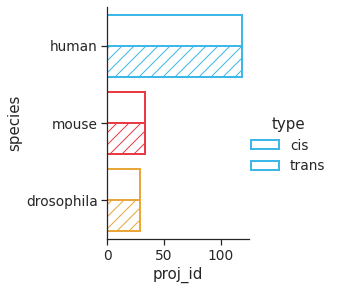

In [418]:
sc_bar = sns.catplot(data=df_total_projects, y='species', x='proj_id', height=4, aspect=9/9.5, kind="bar", hue='type', order=['human', 'mouse', 'drosophila'], fill=False, edgecolor=['#3CB7E8', '#E83B43', '#E8A63B'], linewidth=2)
bars = sc_bar.axes.ravel()[0].patches

pattern=[' ','//']

# replace 2 with 7 in your code
hatches=np.repeat(pattern,3)

for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)
    
plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/projects_per_species.pdf',
            transparent=True)

#sc_bar.legend()
#splot.set(xscale="log")
#splot.set_xticks([20, 300, 500])
#splot.set_major_formatter(matplotlib.ticker.ScalarFormatter())

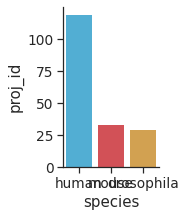

In [911]:
sc_bar = sns.catplot(data=df_total_projects, x='species', y='proj_id', height=3, aspect=8/9.5, kind="bar", order=['human', 'mouse', 'drosophila'], fill=True, edgecolor=['black', 'black', 'black'], linewidth=0, palette=['#3CB7E8', '#E83B43', '#E8A63B'])
bars = sc_bar.axes.ravel()[0].patches

pattern=[' ','//']

# replace 2 with 7 in your code
hatches=np.repeat(pattern,3)

for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)
    
plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/projects_per_species.pdf',
            transparent=True)

In [ ]:
sc_bar = sns.catplot(data=df_total_projects, y='species', x='proj_id', height=4, aspect=9/9.5, kind="bar", hue='type', order=['human', 'mouse', 'drosophila'], fill=False, edgecolor=['#3CB7E8', '#E83B43', '#E8A63B'], linewidth=2)
bars = sc_bar.axes.ravel()[0].patches

pattern=[' ','//']

# replace 2 with 7 in your code
hatches=np.repeat(pattern,3)

for pat,bar in zip(hatches,bars):
    bar.set_hatch(pat)
    
plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/projects_per_species.pdf',
            transparent=True)

#sc_bar.legend()
#splot.set(xscale="log")
#splot.set_xticks([20, 300, 500])
#splot.set_major_formatter(matplotlib.ticker.ScalarFormatter())

In [ ]:
sns.catplot(data=df_whole[df_whole['P_val_agg'] <= 0.04].sort_values(['X.2', 'P_val_agg']), y='X.1', x='P_val_agg_log', hue='X.2', height=10, aspect=8/9.5, kind='bar', dodge=False)
plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/GO_human_10kbp_trans.pdf',
            transparent=True)